### Restaurants Data Analysis

In [29]:
#import
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import numpy as np

#geopy to convert address
from geopy.geocoders import Nominatim

import json
import requests
import urllib.request, json
from pandas.io.json import json_normalize

#Matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

#K-means
from sklearn.cluster import KMeans

import folium
!pip install html5lib
!pip install haversine

from haversine import haversine, Unit
print('Library imported.')


# I-Data Wrangling 

In [63]:
#from pandas import ExcelWriter
#from pandas import ExcelFile
path = ("C:/Users/Rabla/Desktop/IBM-Capstone/Capstone_Week4/DOHMH_NY.csv")
Resto = pd.read_csv(path)
Resto.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50065815,'WICHCRAFT,Manhattan,1407,BROADWAY,10018.0,7184500886,Sandwiches,9/17/2018,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Y,24.0,NaN,NaN,4/21/2020,Cycle Inspection / Initial Inspection,40.753432,-73.987151,105.0,3.0,11300.0,1015265.0,1.008140e+09,MN17
1,41257749,POPEYES,Staten Island,1351,FOREST AVENUE,10302.0,7187201545,Chicken,9/19/2018,Violations were cited in the following area(s).,06B,"Tobacco use, eating, or drinking from open con...",Y,23.0,NaN,NaN,4/21/2020,Cycle Inspection / Initial Inspection,40.625950,-74.134450,501.0,49.0,20100.0,5024915.0,5.010520e+09,SI07
2,50056635,NEW DOUBLE HAPPINESS,Brooklyn,2637,86 STREET,11223.0,7182669898,Chinese,12/13/2018,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,17.0,B,12/13/2018,4/21/2020,Cycle Inspection / Re-inspection,40.596033,-73.984059,311.0,47.0,40200.0,3340112.0,3.070930e+09,BK29
3,41552525,MELTING POT CUISINE,Queens,3601,VERNON BOULEVARD,11106.0,7186062670,Caribbean,1/18/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,6.0,A,1/18/2019,4/21/2020,Cycle Inspection / Initial Inspection,40.761784,-73.942586,401.0,26.0,3900.0,4004340.0,4.003550e+09,QN68
4,50051582,Q & N FOOD,Manhattan,107,EAST 125 STREET,10035.0,2128602021,Delicatessen,10/14/2016,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,10.0,A,10/14/2016,4/21/2020,Pre-permit (Operational) / Re-inspection,40.804834,-73.938503,111.0,9.0,19600.0,1054473.0,1.017740e+09,MN34


In [64]:
#dropping columns
Resto.drop(['CAMIS','BUILDING','ZIPCODE','PHONE','INSPECTION DATE','ACTION','VIOLATION CODE','VIOLATION DESCRIPTION','CRITICAL FLAG','SCORE','GRADE','GRADE DATE','RECORD DATE','INSPECTION TYPE','Community Board','Council District','Census Tract','BIN','BBL','NTA'],axis=1, inplace = True)
#Rename columns
Resto.rename(columns={"DBA":"E_name", "BORO":"Borough", "STREET":"Street", "CUISINE DESCRIPTION":"Food_Description"},inplace=True)
#Resto.shape
Resto.drop_duplicates(keep= 'first',inplace = True)
Resto.dropna(inplace = True)
Resto.head()

,E_name,Borough,Street,Food_Description,Latitude,Longitude
0,'WICHCRAFT,Manhattan,BROADWAY,Sandwiches,40.753432,-73.987151
1,POPEYES,Staten Island,FOREST AVENUE,Chicken,40.625950,-74.134450
2,NEW DOUBLE HAPPINESS,Brooklyn,86 STREET,Chinese,40.596033,-73.984059
3,MELTING POT CUISINE,Queens,VERNON BOULEVARD,Caribbean,40.761784,-73.942586
4,Q & N FOOD,Manhattan,EAST 125 STREET,Delicatessen,40.804834,-73.938503


In [4]:
#Get Shape of Data Frame
Resto.shape

(26597, 6)

In [65]:
#List all types of food in NYC
foodD =pd.DataFrame(Resto["Food_Description"].unique())
foodD.sort_values(by=0, inplace = True)
foodD

,0
57,Afghan
49,African
5,American
28,Armenian
23,Asian
10,Australian
38,Bagels/Pretzels
18,Bakery
50,Bangladeshi
61,Barbecue


In [66]:
#Borough list
Borough_list = pd.DataFrame(Resto["Borough"].unique())
Borough_list.sort_values(by=0, inplace = True)
Borough_list.reset_index(drop=True, inplace=True)
Borough_list

,0
0,Bronx
1,Brooklyn
2,Manhattan
3,Queens
4,Staten Island


# II-Data Mining

In [67]:
#lets create a new frame
columns_names = ['FoodDescription', 'Bronx', 'Brooklyn', 'Manhattan','Queens', 'Staten_Island', 'Number_In_NYC']
foodData = pd.DataFrame(columns=columns_names)
foodData.head()

,FoodDescription,Bronx,Brooklyn,Manhattan,Queens,Staten_Island,Number_In_NYC


In [68]:
#We are going to find the type of food offers by borough
for food in foodD[0]:
    BxData = Resto[(Resto.Borough == "Bronx") & (Resto.Food_Description ==food)]
    BronxQ =BxData.Food_Description.count()
    
    BkData = Resto[(Resto.Borough == "Brooklyn") & (Resto.Food_Description ==food)]
    BrooklynQ =BkData.Food_Description.count()
    
    MhData = Resto[(Resto.Borough == "Manhattan") & (Resto.Food_Description ==food)]
    ManhattanQ =MhData.Food_Description.count()
    
    QsData = Resto[(Resto.Borough == "Queens") & (Resto.Food_Description ==food)]
    QueensQ =QsData.Food_Description.count()
    
    SdData = Resto[(Resto.Borough == "Staten Island") & (Resto.Food_Description ==food)]
    StatenQ =SdData.Food_Description.count()
    
    total = BronxQ + BrooklynQ + ManhattanQ + QueensQ + StatenQ

    foodData = foodData.append({'FoodDescription':food,
                                'Bronx':BronxQ,
                                'Brooklyn':BrooklynQ,
                                'Manhattan':ManhattanQ,
                                'Queens':QueensQ,
                                'Staten_Island':StatenQ,
                                'Number_In_NYC':total}, ignore_index = True)


foodData.head()
    

,FoodDescription,Bronx,Brooklyn,Manhattan,Queens,Staten_Island,Number_In_NYC
0,Afghan,0,2,5,7,0,14
1,African,28,23,21,4,1,77
2,American,405,1248,2922,998,218,5791
3,Armenian,1,7,13,2,1,24
4,Asian,7,103,182,116,13,421


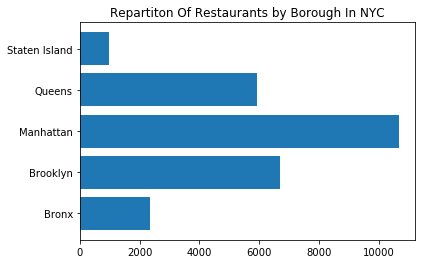

In [69]:
#Let's visualize.
xaxis = ["Bronx", "Brooklyn","Manhattan", "Queens", "Staten Island"]
yaxis = [foodData.Bronx.sum(), foodData.Brooklyn.sum(), foodData.Manhattan.sum(), foodData.Queens.sum(), foodData.Staten_Island.sum()]
plt.title('Repartiton Of Restaurants by Borough In NYC')
plt.barh(xaxis, yaxis)
plt.show()

In [70]:
#Let see in term of percentage these foods are represented in NYC
TotalPlaces = foodData.Number_In_NYC.sum()
share=[]
for val in foodData["Number_In_NYC"]:
    per = round(((val/TotalPlaces)*100),2)
    share.append(per)
foodData["%_Of_NYC_Restaurants"] = share
foodData.head()

,FoodDescription,Bronx,Brooklyn,Manhattan,Queens,Staten_Island,Number_In_NYC,%_Of_NYC_Restaurants
0,Afghan,0,2,5,7,0,14,0.05
1,African,28,23,21,4,1,77,0.29
2,American,405,1248,2922,998,218,5791,21.77
3,Armenian,1,7,13,2,1,24,0.09
4,Asian,7,103,182,116,13,421,1.58


In [71]:
#get data shape
foodData.shape

(84, 8)

### Top 10 of type of food represented in New York City

In [72]:
foodDataSorted = foodData.sort_values(by="Number_In_NYC", ascending = False)
foodDataSorted.reset_index(drop=True,inplace=True)
foodDataSorted.head(10)

,FoodDescription,Bronx,Brooklyn,Manhattan,Queens,Staten_Island,Number_In_NYC,%_Of_NYC_Restaurants
0,American,405,1248,2922,998,218,5791,21.77
1,Chinese,284,727,518,765,82,2376,8.93
2,Café/Coffee/Tea,60,468,1010,285,31,1854,6.97
3,Pizza,195,314,360,261,58,1188,4.47
4,Other,75,277,463,188,47,1050,3.95
5,Mexican,125,300,337,200,43,1005,3.78
6,Italian,39,179,574,112,71,975,3.67
7,Japanese,15,188,495,155,34,887,3.33
8,"Latin (Cuban, Dominican, Puerto Rican, South &...",179,134,188,310,12,823,3.09
9,Bakery,76,195,246,227,22,766,2.88


In [73]:
#get data shape
foodData.shape

(84, 8)

### Let's work on borough Manhattan

In [74]:
#Only Manhattan Data
Mh_df = Resto[Resto.Borough == "Manhattan"]
#Sort by Food description
Mh_df = Mh_df.dropna()
Mh_df.sort_values(by="Food_Description", inplace= True)
Mh_df.drop_duplicates(keep= 'first',inplace = True)
Mh_df.reset_index(drop=True, inplace=True)
Mh_df.head()

,E_name,Borough,Street,Food_Description,Latitude,Longitude
0,KHYBER PASS,Manhattan,ST MARKS PLACE,Afghan,40.728765,-73.988104
1,AFGHAN KEBAB HOUSE #1,Manhattan,9 AVENUE,Afghan,40.764244,-73.988380
2,AFGHAN KEBAB HOUSE,Manhattan,2 AVENUE,Afghan,40.767975,-73.958978
3,Nansense,Manhattan,WEST 39 STREET,Afghan,40.754569,-73.989363
4,ARIANA KEBAB HOUSE,Manhattan,9 AVENUE,Afghan,40.764993,-73.987856


#### Let's map some resto (African food Resto in Manhattan)

In [76]:
#We going to get manhattan GPS
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="on_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude 
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [77]:
Mh = Mh_df[(Mh_df.Food_Description =="African")]

In [78]:
m = folium.Map(location=[40.7896239, -73.9598939], zoom_start=13) 
for lat, lng, label in zip(Mh['Latitude'], Mh['Longitude'], Mh['E_name']):
    folium.Marker(
        [lat, lng],
        popup=label,
     ).add_to(m)
m

# III-Foursquare Section


In [80]:
#Get number of borough and neiborhoods
#print('The dataframe has {} boroughs and {} neighborhoods.'.format(len(dfStack['Borough'].unique()), dfStack.shape))
LIMIT = 100 # limit of number 
radius = 500 # define radius
Cl_ID ='PKDDMXMWQQEBO3QSFTXG1WHFUTHY1KSR3FPRMAGDQETCD0UN'
Cl_SECRET = 'PL5AMKK2C3GDJWX5Q2HIIOLSLHBL0KER5LTKR4ZSW3V11WOW'
VERSION = '20180605'


print('My credentails:')
print('CLIENT_ID: ' + Cl_ID)
print('CLIENT_SECRET:' + Cl_SECRET)

My credentails:
CLIENT_ID: PKDDMXMWQQEBO3QSFTXG1WHFUTHY1KSR3FPRMAGDQETCD0UN
CLIENT_SECRET:PL5AMKK2C3GDJWX5Q2HIIOLSLHBL0KER5LTKR4ZSW3V11WOW


#### Now, let's get the top 20 of Restaurants around Times Squares 42 street within a radius of 500 meters.

In [81]:
#Let's get Times Squares 42st Longitude and Latitude(40.75773 -73.985708)
#We going to get manhattan GPS
address = 'Times Square, NY'

geolocator = Nominatim(user_agent="on_explorer")
location = geolocator.geocode(address)
Tsq_lat = location.latitude
Tsq_long = location.longitude 
print('The geograpical coordinate of Times Square in Manhattan are {}, {}.'.format(Tsq_lat, Tsq_long))


The geograpical coordinate of Times Square in Manhattan are 40.757280550000004, -73.98585503545917.


In [82]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    Cl_ID, 
    Cl_SECRET, 
    VERSION, 
    Tsq_lat, 
    Tsq_long, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=PKDDMXMWQQEBO3QSFTXG1WHFUTHY1KSR3FPRMAGDQETCD0UN&client_secret=PL5AMKK2C3GDJWX5Q2HIIOLSLHBL0KER5LTKR4ZSW3V11WOW&v=20180605&ll=40.757280550000004,-73.98585503545917&radius=500&limit=100'

In [83]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ecad9dc3907e7001bf4f687'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Theater District',
  'headerFullLocation': 'Theater District, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 110,
  'suggestedBounds': {'ne': {'lat': 40.76178055450001,
    'lng': -73.97992538658995},
   'sw': {'lat': 40.7527805455, 'lng': -73.99178468432838}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ec0a81fb6341cd41f1ef402',
       'name': 'Minskoff Theatre',
       'location': {'address': '1515 Broadway',
        'crossStreet': 'at W 45th St',
        'lat': 40.75738906224092,
        'lng': 

In [84]:
#Get list of Latitude and Longitude
#results['response']['groups'][0]['items']#['name']
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

#Rename columns
nearby_venues.rename(columns={"venue.location.lat": "Location_lat", "venue.location.lng": "Location_lng"}, inplace = True)

#drop nan row
nearby_venues.dropna(inplace=True)
nearby_venues.head(10)


,Location_lat,Location_lng
0,40.757389,-73.985537
1,40.756908,-73.984503
2,40.757052,-73.987488
3,40.757237,-73.987454
4,40.756548,-73.983923
5,40.757481,-73.985623
6,40.757866,-73.986909
7,40.756500,-73.987880
8,40.758268,-73.988107
9,40.759107,-73.986697


In [85]:
nearby_venues.shape

(100, 2)

In [86]:
#lets create a new frame
#columns_names = ['Latitude', 'Longitude']
columns_names = ['E_name', 'Food_Description','Latitude', 'Longitude']
BetaData = pd.DataFrame(columns=columns_names)
BetaData.head()

,E_name,Food_Description,Latitude,Longitude


In [87]:
#Base on Haversine Formula we are going to find the nearestplaces where they can enjoy they meals

for f_gps in zip (nearby_venues["Location_lat"],nearby_venues["Location_lng"]):
    #for r_gps in zip(Mh_df["Latitude"], Mh_df["Longitude"]): #, Mh_df["E_name"],  Mh_df["Food_Description"]:
    for r_gps in zip(Mh_df["Latitude"], Mh_df["Longitude"], Mh_df["E_name"],  Mh_df["Food_Description"]):
        if(haversine(f_gps, (r_gps[0],r_gps[1]))<= 0.03):
            BetaData = BetaData.append({'E_name':r_gps[2],
                                        'Food_Description':r_gps[3],
                                        'Latitude':r_gps[0],
                                        'Longitude':r_gps[1]}, ignore_index = True)
BetaData.head()
            

,E_name,Food_Description,Latitude,Longitude
0,O'DONOGHUE'S,American,40.756739,-73.984634
1,BUGIS STREET,American,40.756660,-73.984396
2,VIRGIL'S BBQ,Barbecue,40.756709,-73.984558
3,TIMES DELI & CAFE,Delicatessen,40.756756,-73.984670
4,Lyric Theatre,American,40.756995,-73.987172


In [88]:
BetaData.shape

(300, 4)

#### Now let's map all this place four our visitors

In [26]:
visitorsmap = folium.Map(location=[40.757280550000004, -73.98585503545917], zoom_start=13) 
for lat, lng, label in zip(BetaData['Latitude'], BetaData['Longitude'], BetaData['E_name']):
    folium.Marker(
        [lat, lng],
        popup=label,
     ).add_to(visitorsmap)
visitorsmap

#### Let's be more specific , let's they are looking for Chinese food

In [27]:
#Let's be more specific , 
#let's they are looking for Chinese food
sData = BetaData[(BetaData.Food_Description =="American")]

In [28]:
visitorsmap = folium.Map(location=[40.757280550000004, -73.98585503545917], zoom_start=13) 
for lat, lng, label in zip(sData['Latitude'], sData['Longitude'], sData['E_name']):
    folium.Marker(
        [lat, lng],
        popup=label,
     ).add_to(visitorsmap)
visitorsmap